In [5]:
!pip install kmodes

In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn import metrics
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder
from scipy.cluster.hierarchy import dendrogram, linkage
import matplotlib.pyplot as plt
from kmodes.kmodes import KModes

In [7]:
voting_data = pd.read_csv(r'E:\DAO_Voting_1101\merged_data_files\FT\0xgov.eth_merged_data.csv')
cols_list = ['voter_address', 'choice', 'voting_power', 'timestamp', 'relative_time_voting']
X = voting_data[cols_list]
X

,voter_address,choice,voting_power,timestamp,relative_time_voting
0,0x213209B1a4530817553BaA1512a37F844A6053D2,1,428571.428600,1691440241,0.000095
1,0x39eA25C016a3E90E8E72dBBE215a1Ab62429f66F,1,4.309370,1691441681,0.003428
2,0xc2AcE1E2fEE2d1e4b33261913D89CAF657E99734,1,52.147742,1691447203,0.016211
3,0xDBaE4A204A9eE579E402c7Cf9F72005eCBf8f8e4,1,58.996172,1691447221,0.016252
4,0xb7985A153FF4C8fc197b859F6f7979B126Aaa315,1,8.996932,1691448268,0.018676
...,...,...,...,...,...
1530,0xBD1f7d88C76A86C60d41bDDD4819fAe404e7151E,1,908.156562,1627615441,0.462501
1531,0x311F21570ABb9bB7d825c0990975079EF22e9d63,1,814.000000,1627768035,0.588653
1532,0x68B8259078d18c43Fb02cBaCe669153c3D5fc479,1,1018.568227,1628097877,0.861340
1533,0x420dEd19628A3A935E71D524C90563AFAd40713B,2,3000.000000,1628144111,0.899563


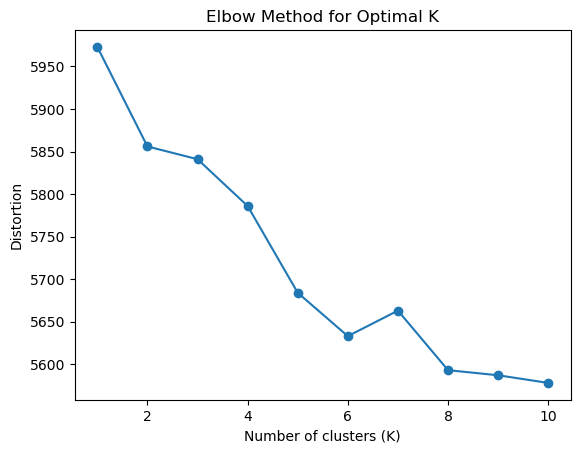

Optimal K value: 1


In [9]:
distortions = []

# Calculate distortion for a range of K values
K_range = range(1, 11)
for k in K_range:
    km = KModes(n_clusters=k, init='Huang', n_init=5, verbose=0)
    km.fit_predict(X)
    distortions.append(km.cost_)

# Plot the elbow
plt.plot(K_range, distortions, marker='o')
plt.xlabel('Number of clusters (K)')
plt.ylabel('Distortion')
plt.title('Elbow Method for Optimal K')
plt.show()

optimal_k = np.argmin(np.diff(distortions)) + 1
print("Optimal K value:", optimal_k)